In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import math
import shutil
import glob
import pandas as pd
from pathlib import Path

In [17]:
ROOT = "/Users/gauravtyagi/Downloads/Data/Brain_tumor/brain_tumor_dataset"
ROOT_TRAINING = "/Users/gauravtyagi/Downloads/Data/Brain_tumor/training"
ROOT_TEST = "/Users/gauravtyagi/Downloads/Data/Brain_tumor/testing"
ROOT_VALID = "/Users/gauravtyagi/Downloads/Data/Brain_tumor/validating"
number_of_images = {}

for dir in os.listdir(ROOT):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT,dir)))

In [18]:
number_of_images.items()

dict_items([('no', 98), ('yes', 137)])

In [19]:
#Split Test , Training , Validate data 

In [20]:
#Create Training folder 
# Run chmod -R 777 /Users/gauravtyagi/Downloads/Data/Brain_tumor/dataset

# if not os.path.exists("ROOT"+"/training2") :
#     os.makedirs(ROOT + "/training2")
    
#     for dir in os.listdir(ROOT) :
#         os.makedirs("ROOT"+"/training2/"+dir)
    
    
#     for img in np.random.choice (a = os.listdir(os.path.join(ROOT,dir)),
#                             size=(math.floor(70/100*number_of_images[dir])-5),
#                                 replace = True) :
#         O = os.path.join(ROOT,dir,img)
#         D= os.path.join(ROOT+"/training2/",dir)
#         shutil.copy(O,D)
#         os.remove(O)
# else :
#     print("The Folder already Exist")


In [21]:
for dir in os.listdir(ROOT_TRAINING):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_TRAINING,dir)))
    
number_of_images.items()

dict_items([('no', 61), ('yes', 61)])

In [22]:
for dir in os.listdir(ROOT_TEST):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_TEST,dir)))
    
number_of_images.items()

dict_items([('no', 21), ('yes', 21)])

In [23]:
for dir in os.listdir(ROOT_VALID):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_VALID,dir)))
    
number_of_images.items()

dict_items([('no', 19), ('yes', 58)])

In [24]:
#Model Build

In [25]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [26]:
#CNN Model
model= Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation= 'relu' , input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))

model.add(Dropout(rate=0.25))

model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 36)      5220      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 36)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      20800     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)      

model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, matrics=['accuracy'])

In [27]:
#Preparing our data using data generator

def preprocessingImg1(path) :
    """
    input : path
    output : Pre processing Image
    """
    
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255,horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224),batch_size=32,class_mode='binary')
    
    return image
    
def preprocessingImg2(path) :
    """
    input : path
    output : Pre processing Image
    """
    
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224),batch_size=32,class_mode='binary')
    
    return image

In [28]:
train_data=preprocessingImg2(ROOT_TRAINING)
test_data=preprocessingImg2(ROOT_TEST)
validate_data=preprocessingImg2(ROOT_VALID)

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [31]:
#Early stopping
from keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(monitor="loss", min_delta=0.01,patience=3,verbose=1,mode="auto")

#Model check point

mc=ModelCheckpoint(monitor="loss",filepath="/Users/gauravtyagi/Downloads/Data/Brain_tumor/brain_tumor_dataset/bestmodel.h5",
                  verbose=1, save_best_only=True,mode='auto')
cd=[es,mc]


In [35]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy']))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [36]:
#Model Training
 hs= model.fit_generator(generator=train_data ,
                         steps_per_epoch=8,epochs=30,
                         verbose=1,
                         validation_data=validate_data,
                         validation_steps=16,
                        callbacks=cd)


Epoch 1/30
8/8 [==============================] - 80s 10s/step - loss: 0.6501 - val_loss: 0.5020

Epoch 00001: loss improved from inf to 0.65249, saving model to /Users/gauravtyagi/Downloads/Data/Brain_tumor/brain_tumor_dataset/bestmodel.h5
Epoch 2/30
8/8 [==============================] - 78s 10s/step - loss: 0.5150 - val_loss: 0.3779

Epoch 00002: loss improved from 0.65249 to 0.51020, saving model to /Users/gauravtyagi/Downloads/Data/Brain_tumor/brain_tumor_dataset/bestmodel.h5
Epoch 3/30
8/8 [==============================] - 76s 10s/step - loss: 0.3676 - val_loss: 0.3740

Epoch 00003: loss improved from 0.51020 to 0.36907, saving model to /Users/gauravtyagi/Downloads/Data/Brain_tumor/brain_tumor_dataset/bestmodel.h5
Epoch 4/30
8/8 [==============================] - 78s 10s/step - loss: 0.1761 - val_loss: 0.3510

Epoch 00004: loss improved from 0.36907 to 0.17688, saving model to /Users/gauravtyagi/Downloads/Data/Brain_tumor/brain_tumor_dataset/bestmodel.h5
Epoch 5/30
8/8 [=======

In [37]:
h = hs.history
h.keys()

dict_keys(['val_loss', 'loss'])

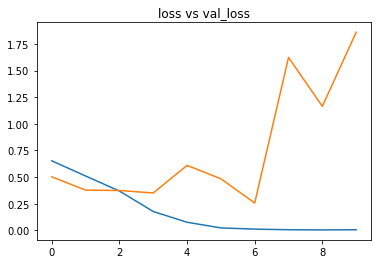

In [38]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'])

plt.title('loss vs val_loss')
plt.show()

In [41]:
from keras.models import load_model

model= load_model("/Users/gauravtyagi/Downloads/Data/Brain_tumor/brain_tumor_dataset/bestmodel.h5")

In [45]:
acc = model.evaluate_generator(test_data)

In [46]:
print(acc)

1.4397265911102295


In [47]:
path = "/Users/gauravtyagi/Downloads/Data/Brain_tumor/brain_tumor_dataset/no/1 no.jpeg"

from keras.preprocessing.image import load_img, img_to_array

img= load_img(path,target_size=(224,224))
input_arr =img_to_array(img)/225

input_arr = np.expand_dims(input_arr,axis=0)

pred = model.predict_classes(input_arr)


In [48]:
pred

array([[0]], dtype=int32)

In [49]:
train_data.class_indices

{'no': 0, 'yes': 1}